# Exploratory Analysis

## Imports

In [2]:
import pandas as pd
import pyreadr


In [3]:
availability = pd.read_excel('../data_LMA/DataCoronaNet/CoronaNet_Data_Availability.xlsx', header=1)
policy = pd.read_excel('../data_LMA/DataCoronaNet/Policy_SubType_Expansion.xlsx')
df1 = pd.read_csv('../data_LMA/DataCoronaNet/coronanet_release.csv.gz', encoding='iso-8859-1')
df2 = pd.read_csv('../data_LMA/DataCoronaNet/coronanet_release_allvars.csv.gz',encoding='mac_roman')
df3 = pd.read_csv('../data_LMA/DataCoronaNet/coronanet_data_all_20201205.csv')
deaths = pd.read_csv('../data_LMA/DataCoronaNet/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
policy = policy.dropna(axis=0, how='all')
policy[['Definition', 'Policy Type']]=policy[['Definition', 'Policy Type']].fillna(method='ffill')
policy['Policy Type'].value_counts()

Restriction and Regulation of Businesses                  25
Restrictions and Regulation of Government Services        23
Health Resources                                          18
Social Distancing                                         16
Restriction of Mass Gatherings                            10
External Border Restrictions                               7
Health Testing                                             5
Hygiene                                                    5
New Task Force, Bureau or Administrative Configuration     4
Quarantine                                                 4
Health Monitoring                                          4
Closure and Regulation of Schools                          4
Public Awareness Measures                                  3
                                                           2
Anti-Disinformation Measures                               1
Internal Border Restrictions                               1
Declaration of Emergncy 

## cases_df

### Feature ingeneering

- first 10 deaths as starting point
- 

In [210]:
cases_df = pyreadr.read_r('../data_LMA/DataCoronaNet/JH/COVID-19_Unified-Dataset-master/COVID-19.RData') # also works for Rds
print(cases_df.keys()) # let's check what objects we got
cases_df =cases_df['COVID19']

odict_keys(['COVID19'])


In [211]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7521587 entries, 0 to 7521586
Data columns (total 8 columns):
ID           object
Date         object
Cases        object
Cases_New    object
Type         object
Age          object
Sex          object
Source       object
dtypes: object(8)
memory usage: 459.1+ MB


In [212]:
cases_df = cases_df.drop(columns=['Age','Sex', 'Source'])
cases_df.Date =  pd.to_datetime(cases_df.Date)
cases_df['Cases_New'] = cases_df['Cases_New'].astype('float')
cases_df['Cases'] = cases_df['Cases'].astype('float')
cases_df['Cases'] = pd.to_numeric(cases_df['Cases'], downcast='float')
cases_df['Cases_New'] = pd.to_numeric(cases_df['Cases_New'], downcast='float')

In [214]:
cases_df.head()

,ID,Date,Cases,Cases_New,Type
0,AD,2020-01-22,0.0,0.0,Active
1,AD,2020-01-22,0.0,0.0,Confirmed
2,AD,2020-01-22,0.0,0.0,Deaths
3,AD,2020-01-22,0.0,0.0,Recovered
4,AD,2020-01-23,0.0,0.0,Active


In [217]:
cases_df[cases_df.ID == 'US']

,ID,Date,Cases,Cases_New,Type
3508551,US,2020-01-21,1.0,1.0,Confirmed
3508552,US,2020-01-21,0.0,0.0,Deaths
3508553,US,2020-01-22,0.0,0.0,Active
3508554,US,2020-01-22,1.0,1.0,Active
3508555,US,2020-01-22,0.0,0.0,Confirmed
3508556,US,2020-01-22,1.0,1.0,Confirmed
3508557,US,2020-01-22,1.0,0.0,Confirmed
3508558,US,2020-01-22,0.0,0.0,Deaths
3508559,US,2020-01-22,0.0,0.0,Deaths
3508560,US,2020-01-22,0.0,0.0,Deaths


In [213]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7521587 entries, 0 to 7521586
Data columns (total 5 columns):
ID           object
Date         datetime64[ns]
Cases        float32
Cases_New    float32
Type         object
dtypes: datetime64[ns](1), float32(2), object(2)
memory usage: 229.5+ MB


In [180]:
cases_df.Sex.value_counts()
pd.unique(cases_df[cases_df['ID']!='FR']['Age']).tolist()

['Total']

## policies_df

In [9]:
policies_df = pyreadr.read_r('../data_LMA/DataCoronaNet/JH/COVID-19_Unified-Dataset-master/Policy.RData') # also works for Rds
print(policies_df.keys()) # let's check what objects we got
policies_df =policies_df['Policy']

odict_keys(['Policy'])


In [9]:
policies_df.head()

,ID,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-01-01,C1,0.0,NaN,NaN,OxCGRT
1,AD,2020-01-01,C2,0.0,NaN,NaN,OxCGRT
2,AD,2020-01-01,C3,0.0,NaN,NaN,OxCGRT
3,AD,2020-01-01,C4,0.0,NaN,NaN,OxCGRT
4,AD,2020-01-01,C5,0.0,NaN,NaN,OxCGRT


In [11]:
france = policies_df[policies_df['ID']=='FR']
france[france['PolicyType']=='C1']
france

,ID,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
895900,FR,2020-01-01,C1,0.00,NaN,NaN,OxCGRT
895901,FR,2020-01-01,C2,0.00,NaN,NaN,OxCGRT
895902,FR,2020-01-01,C3,0.00,NaN,NaN,OxCGRT
895903,FR,2020-01-01,C4,0.00,NaN,NaN,OxCGRT
895904,FR,2020-01-01,C5,0.00,NaN,NaN,OxCGRT
895905,FR,2020-01-01,C6,0.00,NaN,NaN,OxCGRT
895906,FR,2020-01-01,C7,0.00,NaN,NaN,OxCGRT
895907,FR,2020-01-01,C8,0.00,NaN,NaN,OxCGRT
895908,FR,2020-01-01,E1,0.00,NaN,NaN,OxCGRT
895909,FR,2020-01-01,E2,0.00,NaN,NaN,OxCGRT


In [134]:
policies_df.Date =  pd.to_datetime(policies_df.Date)

In [205]:
policies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793100 entries, 0 to 2793099
Data columns (total 6 columns):
ID             object
Date           datetime64[ns]
PolicyType     object
PolicyValue    float32
PolicyFlag     object
PolicyNotes    object
dtypes: datetime64[ns](1), float32(1), object(4)
memory usage: 117.2+ MB


In [204]:
policies_df = policies_df.drop(columns=['PolicySource'])
policies_df.Date =  pd.to_datetime(policies_df.Date)
policies_df['PolicyValue'] = policies_df['PolicyValue'].astype('float')
policies_df['PolicyValue'] = pd.to_numeric(policies_df['PolicyValue'], downcast='float')
policies_df.dtypes

ID                     object
Date           datetime64[ns]
PolicyType             object
PolicyValue           float32
PolicyFlag             object
PolicyNotes            object
dtype: object

In [148]:
policies_df.iloc[0][1].month == 1

True

In [216]:
policies_df[(policies_df['Date'].dt.month == 3 )& (policies_df['PolicyValue']!=0)&(policies_df['ID']=='AF')].dropna()

,ID,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes
22942,AF,2020-03-01,C3,2.0,False,All public gatherings in Herat were banned unt...
22952,AF,2020-03-01,H1,2.0,True,"""Efforts mad by the MoPH for the prevention an..."
23343,AF,2020-03-14,C1,3.0,True,"On March 14, 2020, the Afghan government annou..."
23374,AF,2020-03-15,C1,3.0,True,"On March 14, 2020, the Afghan government annou..."
23405,AF,2020-03-16,C1,3.0,True,"On March 14, 2020, the Afghan government annou..."
23469,AF,2020-03-18,C3,2.0,True,The Afghan Ministry of Interior (MoI) on Wedne...
23654,AF,2020-03-24,C2,3.0,False,"""The authorities in the eastern Afghan region ..."
23689,AF,2020-03-25,C6,2.0,False,"25th March On Wednesday, authorities placed He..."
23690,AF,2020-03-25,C7,1.0,False,"25th March On Wednesday, authorities placed He..."
23716,AF,2020-03-26,C2,3.0,False,"On Wednesday (March 25), authorities placed He..."


In [140]:
temp=policies_df[policies_df['ID']=='AF']
temp[temp['Date'].month==3]

AttributeError: 'Series' object has no attribute 'months'

## countries_df

In [12]:
countries_df = pd.read_csv('../data_LMA/DataCoronaNet/JH/COVID-19_Unified-Dataset-master/COVID-19_LUT.csv')
countries_df

,ID,Level,ISO1_3N,ISO1_3C,ISO1_2C,ISO2,ISO2_UID,FIPS,NUTS,AGS,...,ZCTA,Longitude,Latitude,Population,Admin,Admin0,Admin1,Admin2,Admin3,NameID
0,AD,Country,20,AND,AD,AD,AD,NaN,AD,NaN,...,NaN,1.52,42.51,77265.0,0,Andorra,NaN,NaN,NaN,Andorra
1,AE,Country,784,ARE,AE,AE,AE,NaN,AE,NaN,...,NaN,53.85,23.42,9890400.0,0,United Arab Emirates,NaN,NaN,NaN,United Arab Emirates
2,AF,Country,4,AFG,AF,AF,AF,NaN,AF,NaN,...,NaN,67.71,33.94,38928341.0,0,Afghanistan,NaN,NaN,NaN,Afghanistan
3,AG,Country,28,ATG,AG,AG,AG,NaN,AG,NaN,...,NaN,-61.80,17.06,97928.0,0,Antigua and Barbuda,NaN,NaN,NaN,Antigua and Barbuda
4,AL,Country,8,ALB,AL,AL,AL,NaN,AL,NaN,...,NaN,20.17,41.15,2877800.0,0,Albania,NaN,NaN,NaN,Albania
5,AM,Country,51,ARM,AM,AM,AM,NaN,AM,NaN,...,NaN,45.04,40.07,2963234.0,0,Armenia,NaN,NaN,NaN,Armenia
6,AO,Country,24,AGO,AO,AO,AO,NaN,AO,NaN,...,NaN,17.87,-11.20,32866268.0,0,Angola,NaN,NaN,NaN,Angola
7,AR,Country,32,ARG,AR,AR,AR,NaN,AR,NaN,...,NaN,-63.62,-38.42,45195777.0,0,Argentina,NaN,NaN,NaN,Argentina
8,AT,Country,40,AUT,AT,AT,AT,NaN,AT,NaN,...,NaN,14.55,47.52,9006400.0,0,Austria,NaN,NaN,NaN,Austria
9,AU,Country,36,AUS,AU,AU,AU,NaN,AU,NaN,...,NaN,133.00,-25.00,25459700.0,0,Australia,NaN,NaN,NaN,Australia


In [13]:
countries_df.head()

,ID,Level,ISO1_3N,ISO1_3C,ISO1_2C,ISO2,ISO2_UID,FIPS,NUTS,AGS,...,ZCTA,Longitude,Latitude,Population,Admin,Admin0,Admin1,Admin2,Admin3,NameID
0,AD,Country,20,AND,AD,AD,AD,NaN,AD,NaN,...,NaN,1.52,42.51,77265.0,0,Andorra,NaN,NaN,NaN,Andorra
1,AE,Country,784,ARE,AE,AE,AE,NaN,AE,NaN,...,NaN,53.85,23.42,9890400.0,0,United Arab Emirates,NaN,NaN,NaN,United Arab Emirates
2,AF,Country,4,AFG,AF,AF,AF,NaN,AF,NaN,...,NaN,67.71,33.94,38928341.0,0,Afghanistan,NaN,NaN,NaN,Afghanistan
3,AG,Country,28,ATG,AG,AG,AG,NaN,AG,NaN,...,NaN,-61.80,17.06,97928.0,0,Antigua and Barbuda,NaN,NaN,NaN,Antigua and Barbuda
4,AL,Country,8,ALB,AL,AL,AL,NaN,AL,NaN,...,NaN,20.17,41.15,2877800.0,0,Albania,NaN,NaN,NaN,Albania


In [14]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 21 columns):
ID            10458 non-null object
Level         10459 non-null object
ISO1_3N       10459 non-null int64
ISO1_3C       10459 non-null object
ISO1_2C       10458 non-null object
ISO2          10458 non-null object
ISO2_UID      10458 non-null object
FIPS          3542 non-null float64
NUTS          822 non-null object
AGS           413 non-null float64
IBGE          5594 non-null float64
ZCTA          184 non-null float64
Longitude     10314 non-null float64
Latitude      10314 non-null float64
Population    10311 non-null float64
Admin         10459 non-null int64
Admin0        10459 non-null object
Admin1        10269 non-null object
Admin2        9691 non-null object
Admin3        738 non-null object
NameID        10459 non-null object
dtypes: float64(7), int64(2), object(12)
memory usage: 1.7+ MB


## Deaths

In [427]:
deaths = pd.read_csv('../data_LMA/DataCoronaNet/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Rajout d'une colonne joinant province/state et country/region

In [428]:
deaths['Province/State'] = deaths['Province/State'].fillna('')

In [429]:
deaths['Province/State'] = deaths[['Country/Region', 'Province/State']].apply(' '.join, axis=1).str.strip()

In [430]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,Afghanistan,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846
1,Albania,Albania,41.153300,20.168300,0,0,0,0,0,0,...,743,753,771,787,798,810,822,839,852,870
2,Algeria,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492
3,Andorra,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,77,77
4,Angola,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,340,341,342,345,346,348,350,351,352,353
5,Antigua and Barbuda,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
6,Argentina,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,37714,37941,38216,38322,38473,38730,38928,39156,39305,39512
7,Armenia,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,2040,2068,2090,2121,2142,2164,2193,2228,2254,2277
8,Australia Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Australia New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


In [431]:
# deaths.set_index('Province/State')

### Transposition et Drop des coordonnees

In [432]:
tdeaths = deaths.drop(columns='Country/Region').T
tdeaths.head()

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia Australian Capital Territory,Australia New South Wales,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-32.5228,41.3775,-15.3767,6.4238,14.0583,31.9522,24.2155,15.5527,-13.1339,-19.0154
Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-55.7658,64.5853,166.959,-66.5897,108.277,35.2332,-12.8858,48.5164,27.8493,29.1549
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [435]:
tdeaths=tdeaths.reset_index()
tdeaths.head()

,index,0,1,2,3,4,5,6,7,8,...,261,262,263,264,265,266,267,268,269,270
0,Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia Australian Capital Territory,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,...,-32.5228,41.3775,-15.3767,6.4238,14.0583,31.9522,24.2155,15.5527,-13.1339,-19.0154
2,Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,...,-55.7658,64.5853,166.959,-66.5897,108.277,35.2332,-12.8858,48.5164,27.8493,29.1549
3,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
tdeaths= tdeaths.drop(index=[1,2])

In [439]:
# tdeaths.iloc[:,:]
tdeaths.columns = tdeaths.iloc[0]
tdeaths.drop(index=0, inplace=True)
tdeaths.rename(columns={'Province/State':'date'}, inplace=True)


In [440]:
tdeaths.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia Australian Capital Territory,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
3,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [442]:
tdeaths.date = pd.to_datetime(tdeaths.date)

In [444]:
max_line = tdeaths.shape[0]
max_col = tdeaths.shape[1]
print(f'max_col = {max_col}, max_line = {max_line}')

max_col = 272, max_line = 318


In [511]:
dico = {}
for i in range(2,max_col):
    if tdeaths.iloc[max_line-1,i]>=10:
        dico[tdeaths.columns[i]] = tdeaths.date[min(tdeaths.iloc[:,i][tdeaths.iloc[:,i]>=10])]

In [518]:
tdeaths.iloc[:,3][tdeaths.iloc[:,3]>=10]
type(tdeaths.date[61])

pandas._libs.tslibs.timestamps.Timestamp

In [513]:
len(dico)

185

In [514]:
dico

{'Albania': Timestamp('2020-01-29 00:00:00'),
 'Algeria': Timestamp('2020-01-30 00:00:00'),
 'Andorra': Timestamp('2020-01-31 00:00:00'),
 'Angola': Timestamp('2020-01-29 00:00:00'),
 'Argentina': Timestamp('2020-02-01 00:00:00'),
 'Armenia': Timestamp('2020-01-29 00:00:00'),
 'Australia New South Wales': Timestamp('2020-01-29 00:00:00'),
 'Australia Tasmania': Timestamp('2020-01-29 00:00:00'),
 'Australia Victoria': Timestamp('2020-01-29 00:00:00'),
 'Austria': Timestamp('2020-02-04 00:00:00'),
 'Azerbaijan': Timestamp('2020-01-29 00:00:00'),
 'Bahamas': Timestamp('2020-01-30 00:00:00'),
 'Bahrain': Timestamp('2020-01-29 00:00:00'),
 'Bangladesh': Timestamp('2020-01-31 00:00:00'),
 'Belarus': Timestamp('2020-02-01 00:00:00'),
 'Belgium': Timestamp('2020-01-29 00:00:00'),
 'Belize': Timestamp('2020-01-29 00:00:00'),
 'Benin': Timestamp('2020-01-30 00:00:00'),
 'Bolivia': Timestamp('2020-01-29 00:00:00'),
 'Bosnia and Herzegovina': Timestamp('2020-01-29 00:00:00'),
 'Botswana': Timestam

In [255]:
tdeaths.iloc[2:,1][tdeaths.iloc[2:,1]>=10].index[0]

'3/28/20'

In [110]:
test = tdeaths.iloc[2:,:20] ## Date puis Pays
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


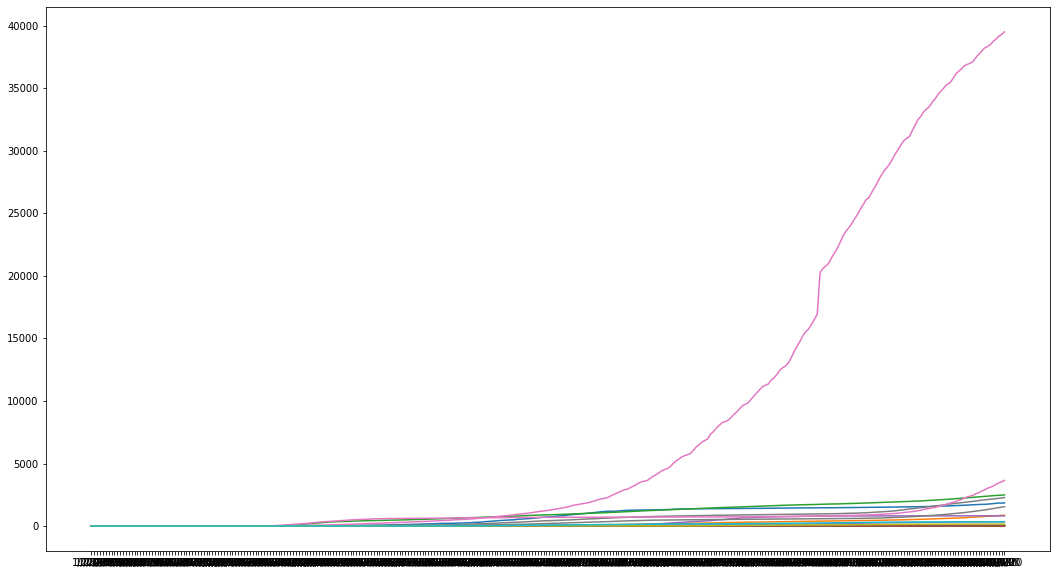

In [109]:
plt.figure(figsize=(18,10))
plt.plot(test)
